In [97]:
import pandas as pd
from textblob import TextBlob
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datasketch import MinHash, MinHashLSH
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import contractions


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vedisingvars/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
file_path = "../data/fake reviews dataset.csv"
df = pd.read_csv(file_path)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [62]:
unique_catgory = df['category'].unique()
print(unique_catgory)

['Home_and_Kitchen_5' 'Sports_and_Outdoors_5' 'Electronics_5'
 'Movies_and_TV_5' 'Tools_and_Home_Improvement_5' 'Pet_Supplies_5'
 'Kindle_Store_5' 'Books_5' 'Toys_and_Games_5'
 'Clothing_Shoes_and_Jewelry_5']


In [99]:
df = df.rename(columns={'text_':'text'})
df['category']=df['category'].str.replace('_5','',regex=False)

In [64]:
df.isnull().sum()

category    0
rating      0
label       0
text        0
dtype: int64

In [65]:
df.duplicated().sum()

12

In [100]:
df.drop_duplicates()

,category,rating,label,text
0,Home_and_Kitchen,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry,1.0,CG,I liked nothing about this dress. The only rea...


In [101]:
df['label_binary'] = df['label'].replace({'CG': 1, 'OR': 0})

https://datastud.dev/posts/nlp-preprocess

In [104]:
df['processed_text']=(df['text']).apply(contractions.fix)
# Loop through each line of text and tokenize
df['processed_text'] = [word_tokenize(line) for line in df['processed_text']]

In [105]:
import string

def remove_punctuation(input_text):
    return [token for token in input_text if token not in set(string.punctuation)]

# Apply punctuation function
df['processed_text'] = [remove_punctuation(line) for line in df['processed_text']]

In [106]:
nltk.download('stopwords')

def remove_stopwords(input_text):
    return [token for token in input_text if token.lower() not in stopwords.words('english')]

# Apply stopword function
df['processed_text'] = [remove_stopwords(line) for line in df['processed_text']]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vedisingvars/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
df.head()

,category,rating,label,text,label_binary,processed_text
0,Home_and_Kitchen,5.0,CG,"Love this! Well made, sturdy, and very comfor...",1,"[Love, Well, made, sturdy, comfortable, love, ..."
1,Home_and_Kitchen,5.0,CG,"love it, a great upgrade from the original. I...",1,"[love, great, upgrade, original, mine, couple,..."
2,Home_and_Kitchen,5.0,CG,This pillow saved my back. I love the look and...,1,"[pillow, saved, back, love, look, feel, pillow]"
3,Home_and_Kitchen,1.0,CG,"Missing information on how to use it, but it i...",1,"[Missing, information, use, great, product, pr..."
4,Home_and_Kitchen,5.0,CG,Very nice set. Good quality. We have had the s...,1,"[nice, set, Good, quality, set, two, months]"


In [108]:
#lemmazation
def lemmatize(input_text):
    # Instantiate class
    lem = WordNetLemmatizer()
    # Lemmatized text becomes input inside all loop runs
    lemmatized_text = input_text
    # Lemmatize each part of speech
    for part_of_speech in ['n', 'v', 'a', 'r', 's']:
        lemmatized_text = [lem.lemmatize(token, part_of_speech).lower() for token in lemmatized_text]
    return lemmatized_text

# Apply lemmatize function
df['processed_text'] = [lemmatize(line) for line in df['processed_text']]

In [109]:
df.head()

,category,rating,label,text,label_binary,processed_text
0,Home_and_Kitchen,5.0,CG,"Love this! Well made, sturdy, and very comfor...",1,"[love, well, make, sturdy, comfortable, love, ..."
1,Home_and_Kitchen,5.0,CG,"love it, a great upgrade from the original. I...",1,"[love, great, upgrade, original, mine, couple,..."
2,Home_and_Kitchen,5.0,CG,This pillow saved my back. I love the look and...,1,"[pillow, save, back, love, look, feel, pillow]"
3,Home_and_Kitchen,1.0,CG,"Missing information on how to use it, but it i...",1,"[miss, information, use, great, product, price]"
4,Home_and_Kitchen,5.0,CG,Very nice set. Good quality. We have had the s...,1,"[nice, set, good, quality, set, two, month]"


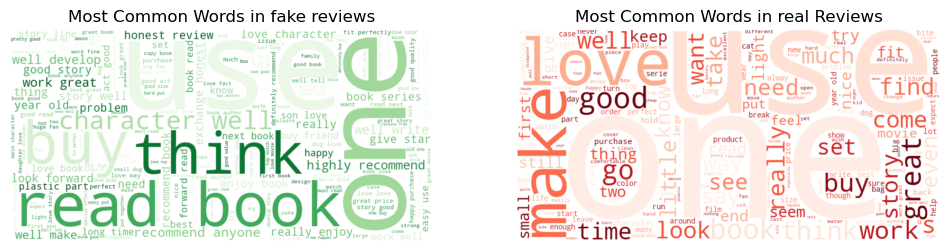

In [111]:
# Separate CG and OR reviews
cg_text = ' '.join([' '.join(words) for words in df[df['label'] == 'CG']['processed_text']])
or_text = ' '.join([' '.join(words) for words in df[df['label'] == 'OR']['processed_text']])

# Generate word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
cg_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(cg_text)
plt.imshow(cg_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in fake reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
or_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(or_text)
plt.imshow(or_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in real Reviews')
plt.axis('off')

plt.show()

In [70]:
label_counts = df['label'].value_counts(normalize=True).reset_index()
label_counts.columns = ['label', 'proportion']

# Plot the proportions
fig = px.bar(label_counts, x='label', y='proportion', title='Count of OR and CG reviews',
             labels={'label': 'Label', 'proportion': 'Proportion'},
             color='label', color_discrete_sequence=['skyblue', 'salmon'])

fig.show()

/Users/vedisingvars/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/vedisingvars/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



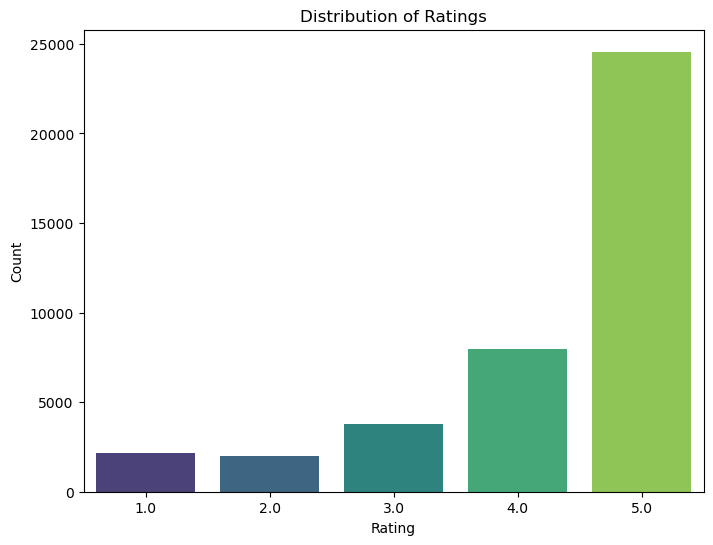

In [71]:

# Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_12895/1687703350.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




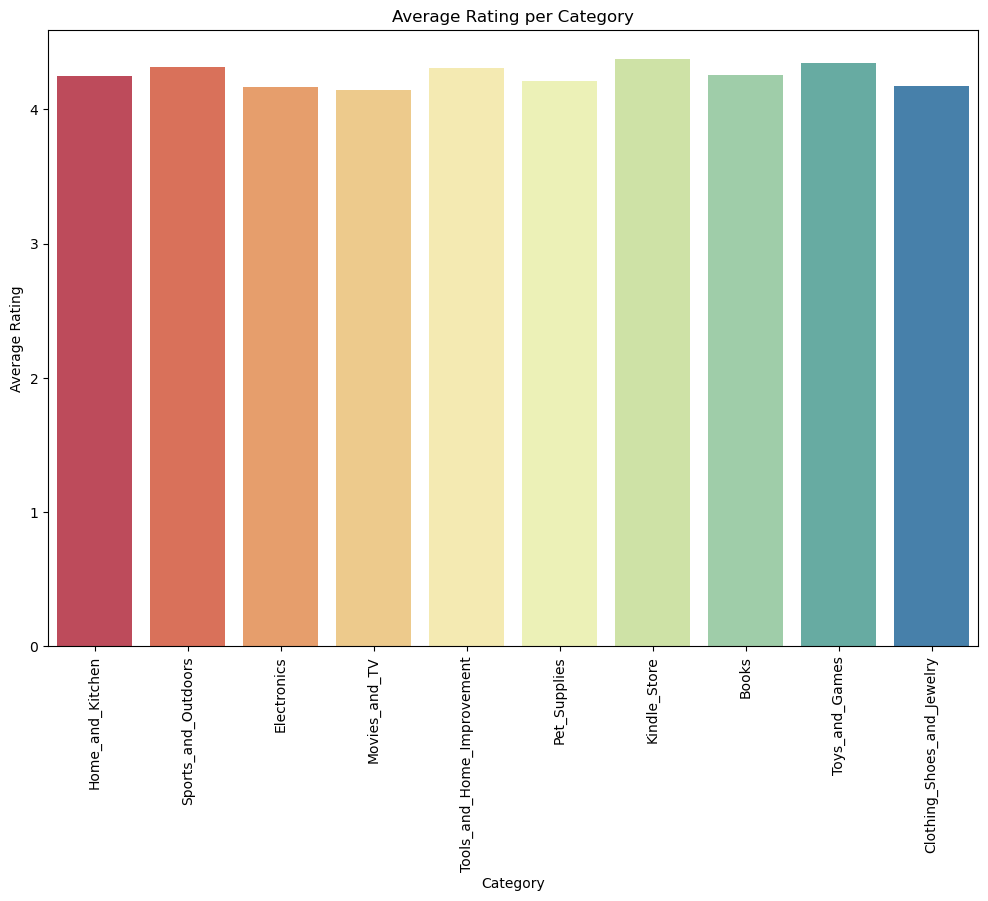

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='category', y='rating', estimator='mean', ci=None, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

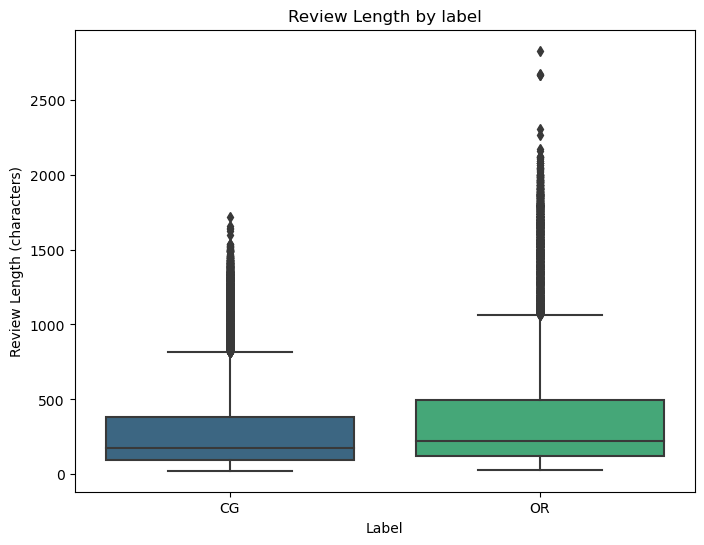

In [73]:
# Add a column for review length
df['review_length'] = df['text'].apply(len)

# Plot review length by rating
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='label', y='review_length', palette='viridis')
plt.title('Review Length by label')
plt.xlabel('Label')
plt.ylabel('Review Length (characters)')
plt.show()

In [74]:
# Count the occurrences of each category
category_counts = df['category'].value_counts()

# Display the category with the most reviews
most_reviews_category = category_counts.idxmax()
most_reviews_count = category_counts.max()

print(f"Category with the most reviews: {most_reviews_category} ({most_reviews_count} reviews)")

Category with the most reviews: Kindle_Store (4730 reviews)


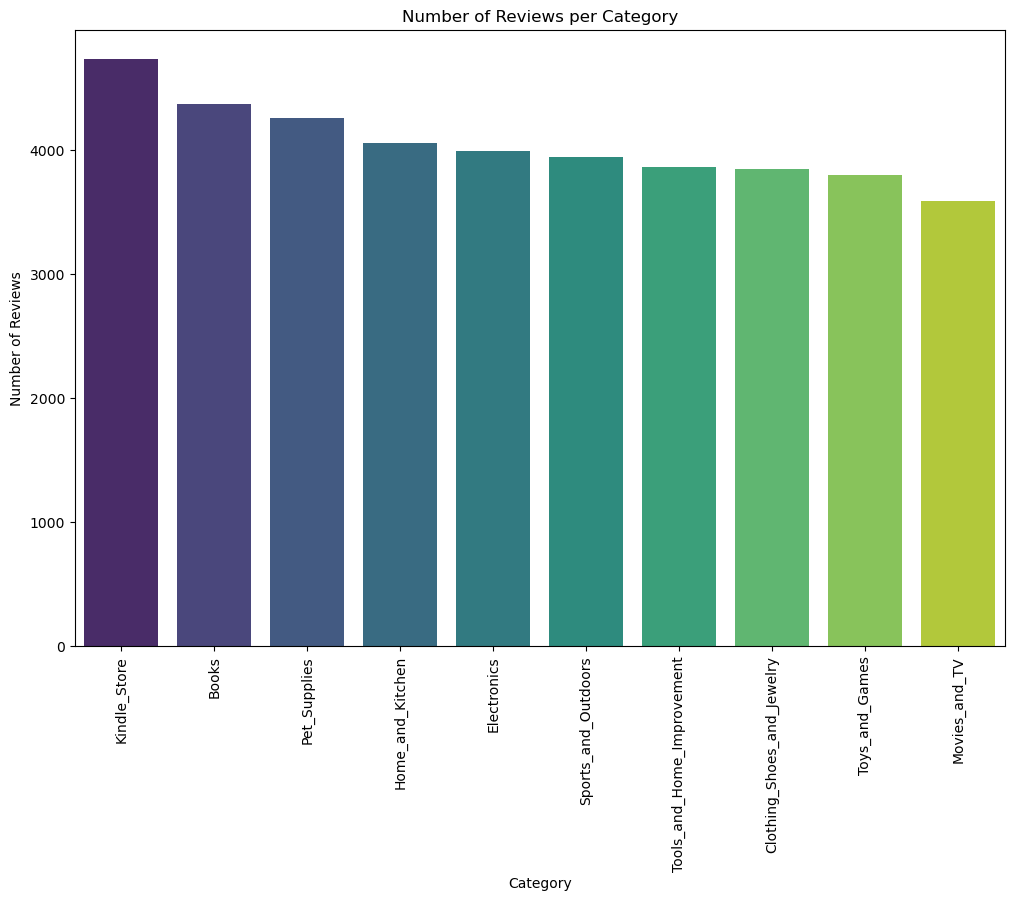

In [17]:
# Plot the number of reviews per category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Reviews per Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.show()

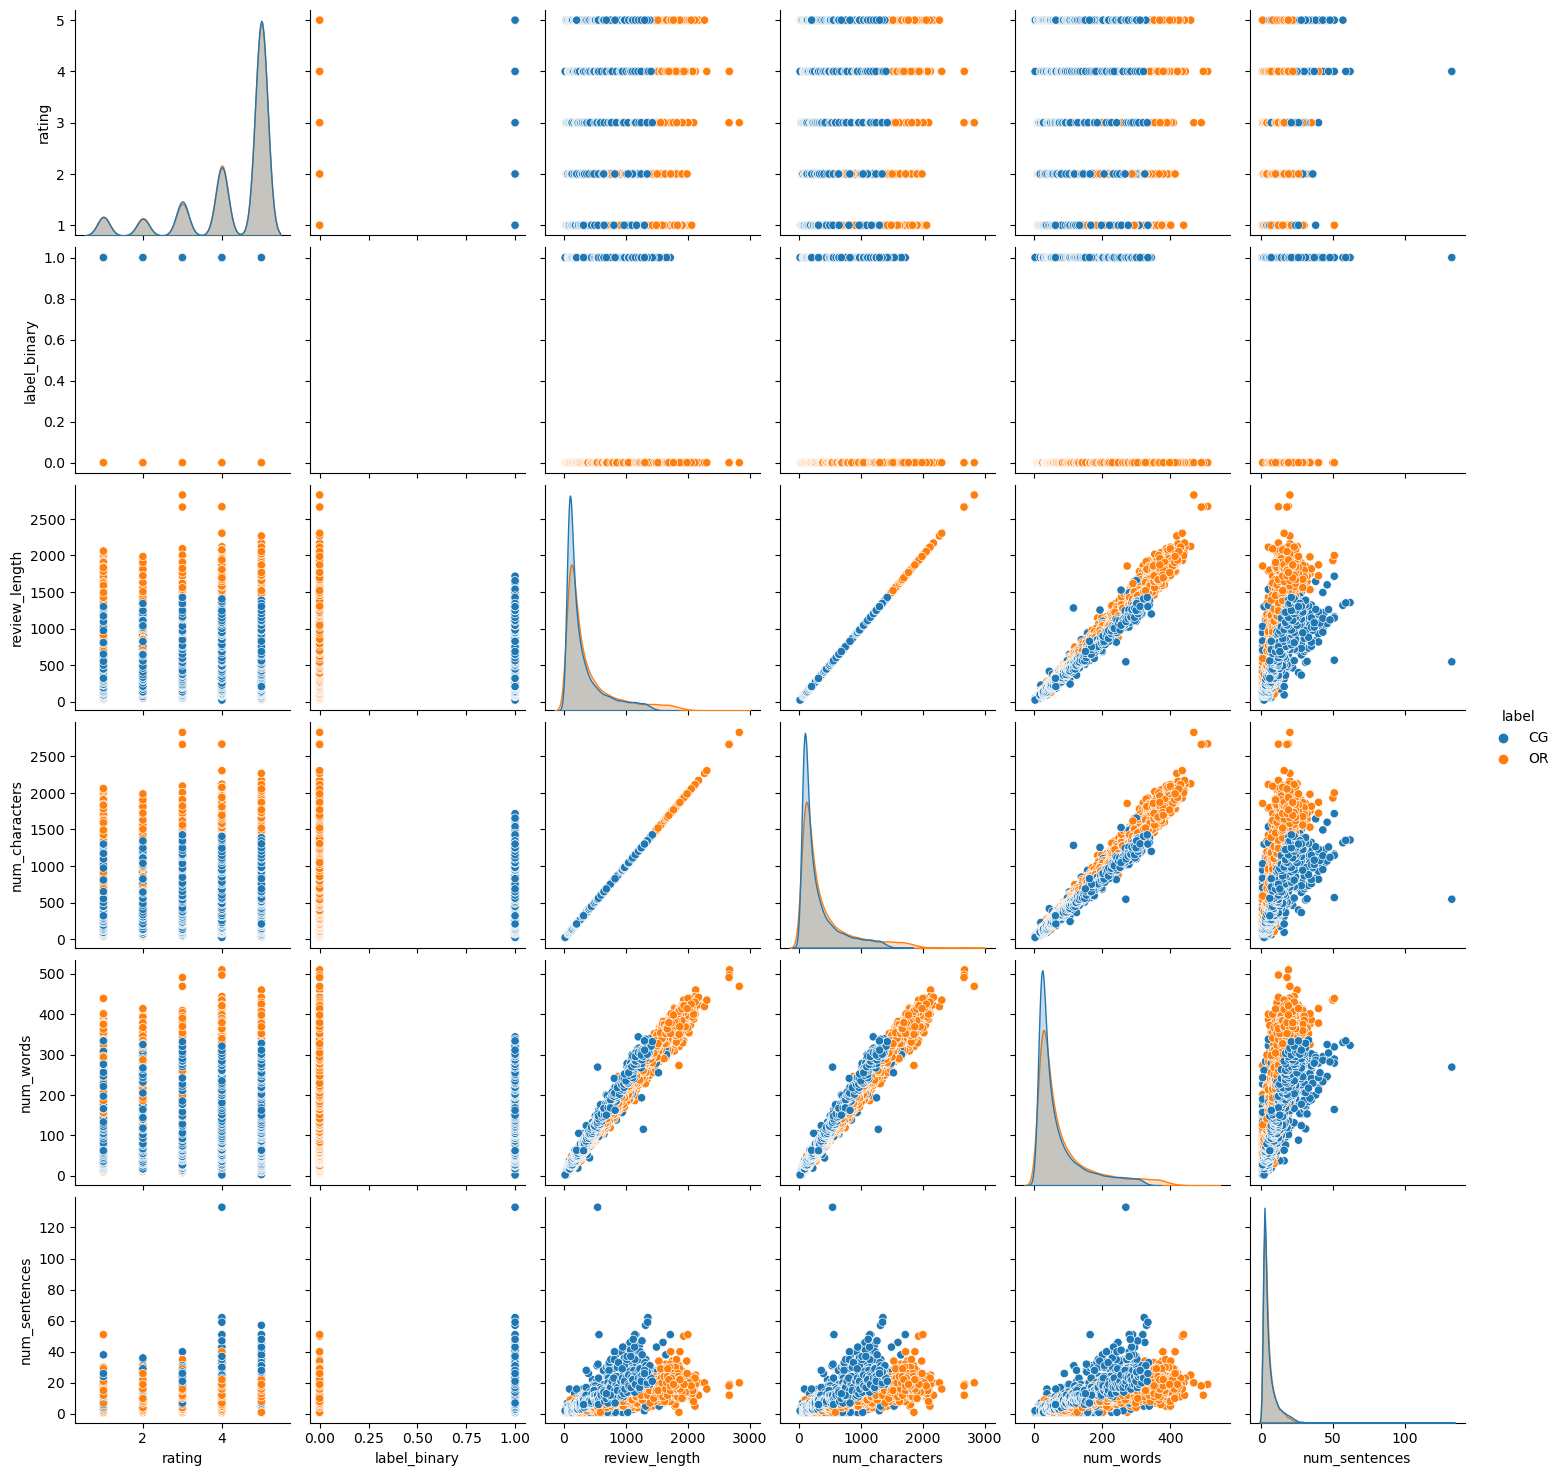

In [20]:
sns.pairplot(df,hue='label')

## Frequent items: apriori

In [112]:
baskets = df['processed_text'].apply(lambda x: list(set(x)))

te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(df_te, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

      support                 itemsets
0    0.086441                     ('')
1    0.082608                     ('s)
2    0.065344                     (``)
3    0.118520                   (also)
4    0.053423                 (anyone)
..        ...                      ...
162  0.061313             (would, use)
163  0.050084             (well, work)
164  0.061709            (would, well)
165  0.050183  (book, character, read)
166  0.053596      (book, story, read)

[167 rows x 2 columns]


## Similar Items/Locality-Sensitive Hashing (LSH)

In [113]:
# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'].apply(' '.join))

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from datasketch import MinHash, MinHashLSH

In [115]:
# Initialize LSH for near-duplicate detection
lsh = MinHashLSH(threshold=0.8, num_perm=128)

# Add each review as a MinHash
for i, review in enumerate(tfidf_matrix):
    m = MinHash(num_perm=128)
    for word in review.nonzero()[1]:  # Get non-zero indices for each TF-IDF vector
        m.update(str(word).encode('utf8'))
    lsh.insert(i, m)

# Query for similar items for a particular review (e.g., index 0)
similar_reviews = lsh.query(m)
print(f"Reviews similar to review 0: {similar_reviews}")

Reviews similar to review 0: [40431]


## Clustering

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Use TF-IDF vectors for clustering
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'].apply(' '.join))


# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Evaluate clustering
score = davies_bouldin_score(tfidf_matrix.toarray(), df['cluster'])
print(f"Davies-Bouldin Index: {score}")

# Check cluster composition
cluster_counts = df.groupby(['cluster', 'label']).size().unstack()
print(cluster_counts)


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

A Davies-Bouldin Index (DBI) over 6 suggests that the clusters are likely overlapping significantly and not well-separated. This high score generally indicates that the clustering is of poor quality, and the clusters may not be capturing distinct groups effectively. Here are some strategies you could try to improve clustering quality - so lets try silhouette score to see if we should choose other number of k's

In [117]:
from sklearn.metrics import silhouette_score

# Try different values of k and calculate DBI and silhouette score
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(tfidf_matrix)
    dbi = davies_bouldin_score(tfidf_matrix.toarray(), labels)
    silhouette_avg = silhouette_score(tfidf_matrix, labels)
    print(f'For k={k}, DBI={dbi:.2f}, Silhouette Score={silhouette_avg:.2f}')

For k=2, DBI=4.78, Silhouette Score=0.01
For k=3, DBI=7.88, Silhouette Score=0.01
For k=4, DBI=5.94, Silhouette Score=0.02
For k=5, DBI=6.37, Silhouette Score=0.02
For k=6, DBI=7.14, Silhouette Score=0.02
For k=7, DBI=7.23, Silhouette Score=0.02
For k=8, DBI=6.54, Silhouette Score=0.02
For k=9, DBI=6.56, Silhouette Score=0.02


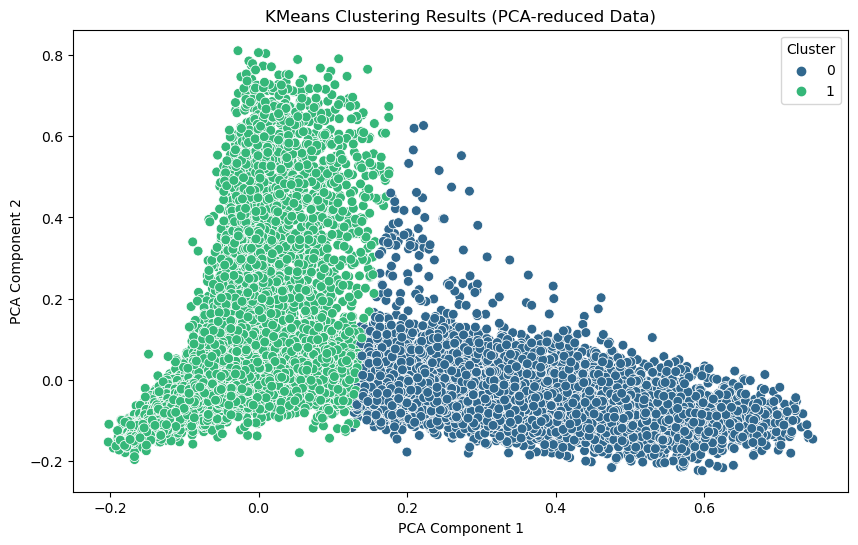

In [120]:
# Perform PCA to reduce the dimensions to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['cluster'], palette="viridis", s=50)
plt.title("KMeans Clustering Results (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

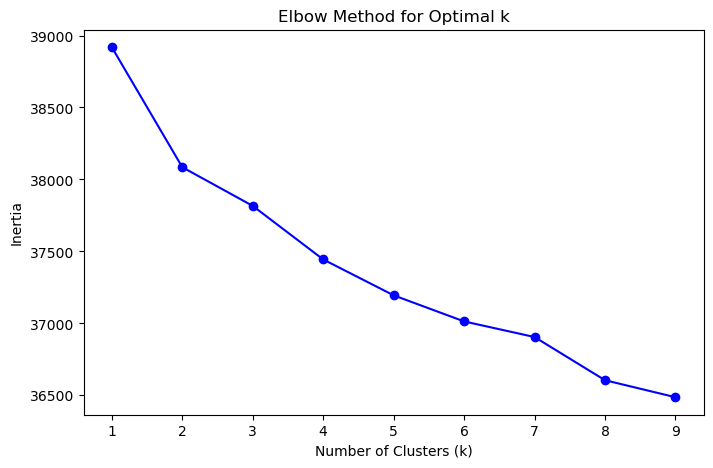

In [121]:
inertia = []
k_values = range(1, 10)

# Calculate inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.show()

In [32]:
df.head(
)

,category,rating,label,text,label_binary,review_length,num_characters,num_words,num_sentences,processed_text
0,Home_and_Kitchen,5.0,CG,"Love this! Well made, sturdy, and very comfor...",1,75,75,18,3,love this well made sturdy and very comfortab...
1,Home_and_Kitchen,5.0,CG,"love it, a great upgrade from the original. I...",1,80,80,19,2,love it a great upgrade from the original ive...
2,Home_and_Kitchen,5.0,CG,This pillow saved my back. I love the look and...,1,67,67,16,2,this pillow saved my back i love the look and ...
3,Home_and_Kitchen,1.0,CG,"Missing information on how to use it, but it i...",1,81,81,19,2,missing information on how to use it but it is...
4,Home_and_Kitchen,5.0,CG,Very nice set. Good quality. We have had the s...,1,85,85,20,3,very nice set good quality we have had the set...


In [34]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit features for simplicity
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

In [35]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

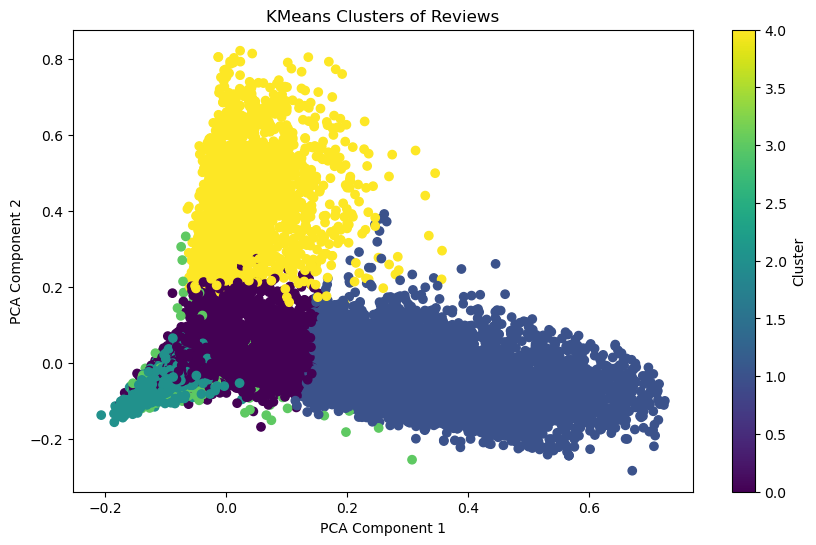

In [36]:
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=df['cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clusters of Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()